In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

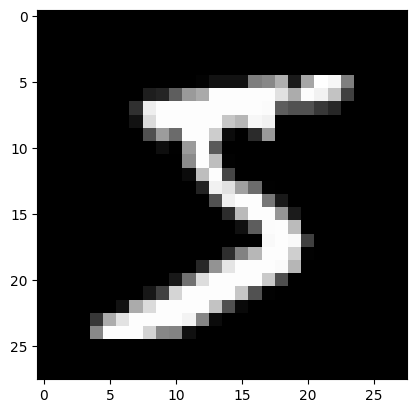

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

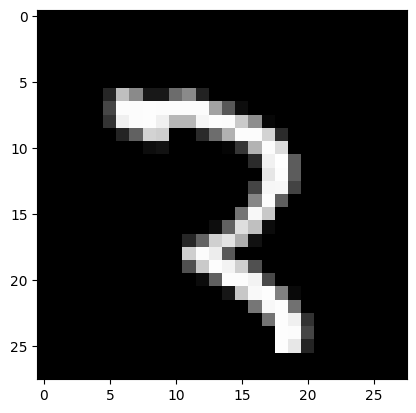

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())


In [22]:
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - accuracy: 0.8553 - loss: 0.4780 - val_accuracy: 0.9727 - val_loss: 0.0900
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9773 - loss: 0.0780 - val_accuracy: 0.9789 - val_loss: 0.0631
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.9845 - loss: 0.0514 - val_accuracy: 0.9837 - val_loss: 0.0483
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9875 - loss: 0.0408 - val_accuracy: 0.9825 - val_loss: 0.0456
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9906 - loss: 0.0310 - val_accuracy: 0.9813 - val_loss: 0.0553


In [25]:
metrics = pd.DataFrame(model.history.history)

print('Adhithya M R 212222240002')
metrics.head()


Adhithya M R 212222240002


,accuracy,loss,val_accuracy,val_loss
0,0.930817,0.234379,0.9727,0.089978
1,0.977500,0.073826,0.9789,0.063064
2,0.984383,0.051851,0.9837,0.048350
3,0.987167,0.041327,0.9825,0.045557
4,0.990333,0.031749,0.9813,0.055316


Adhithya M R 212222240002
Adhithya M R 212222240002


<Axes: >

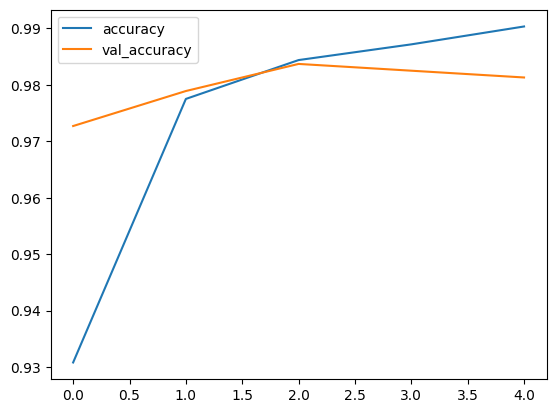

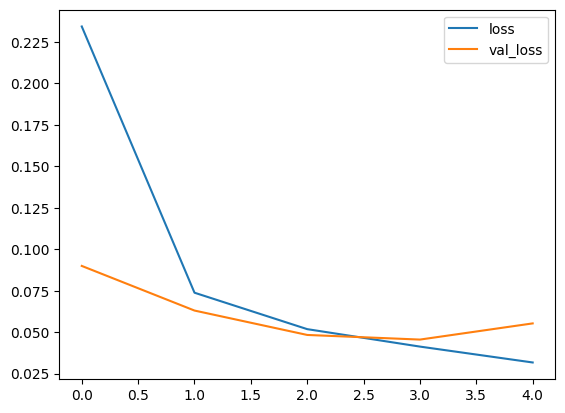

In [26]:
print('Adhithya M R 212222240002')
metrics[['accuracy','val_accuracy']].plot()

print('Adhithya M R 212222240002')
metrics[['loss','val_loss']].plot()

In [83]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

print(confusion_matrix(y_test,x_test_predictions))

print(classification_report(y_test,x_test_predictions))

img = image.load_img('/content/threeeee.png')

type(img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[ 971    2    2    1    0    1    1    1    0    1]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   0    8 1006    8    1    0    0    7    2    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    1    1    0  957    0    2    4    3   14]
 [   1    0    1   22    0  865    3    0    0    0]
 [   5    5    0    0    2    5  938    0    3    0]
 [   0    2    5    6    0    0    0 1011    1    3]
 [   3    1    2   14    0    4    1    4  943    2]
 [   0    4    2    8    4    3    0    4    3  981]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.94      1.00      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.99      

PIL.Image.Image

In [84]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [85]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [86]:
print(x_single_prediction)

[3]


Adhithya M R 212222240002
[3]


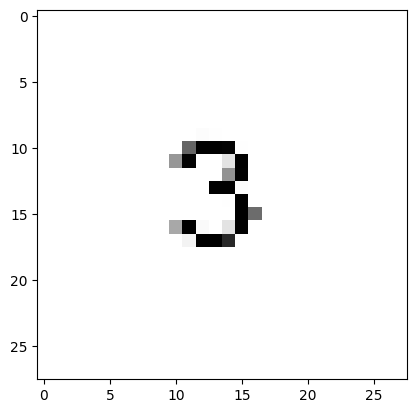

In [87]:
print('Adhithya M R 212222240002')
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print(x_single_prediction)

In [54]:
img1 = image.load_img('/content/seven seven.jpg')

In [55]:
img_tensor_1= tf.convert_to_tensor(np.asarray(img1))
img_28 = tf.image.resize(img_tensor_1,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [56]:
x_single_prediction1 = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [57]:
print(x_single_prediction1)

[7]


Adhithya M R 212222240002
[7]


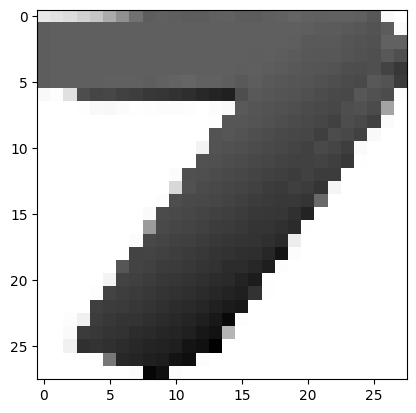

In [58]:
print("Adhithya M R 212222240002")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
print(x_single_prediction1)